# Few extra things 

## 1. Filtering a single column

### 1a. Use OR operation $ ( | )$ when filtering a list of values from a for  a single  column .

```python
Releases=Releases[(Releases.Genre=='action') | (Releases.Genre=='comedy') | (Releases.Genre=='adventure') | (Releases.Genre=='animation') | (Releases.Genre=='drama')]
```

### 1b. New method to filter a single column. `object.isin(list)`

 
`isin(list)` will return logical values showing whether list elements are present in the object or not. 

```python
s = pd.Series(['lama', 'cow', 'lama', 'beetle', 'lama',
...                'hippo'], name='animal')
>>> s.isin(['cow', 'lama'])
0     True
1     True
2     True
3    False
4     True
5    False

```

```python
#Creating an object list and then passing it to the isin()
Genre_filter  = ['action','adventure','animation','comedy','drama']
mov2 = mov[mov.Genre.isin(Genre_filter)]

#passing the list directly
mov3 =mov2[mov2.Studio.isin(['Buena Vista Studios','Sony','Universal', 'WB', 'Paramount Pictures', 'Fox'])]
```
### 1c. Remove the list elements from the object, then use the ``~`` operator before  `object.isin(list)`

To invert the boolean values, use the ``~`` operator:

```
>>> ~s.isin(['cow', 'lama'])
0    False
1    False
2    False
3     True
4    False
5     True
Name: animal, dtype: bool
```

```python
#filtering the data frame
mov1 =mov[~mov.Studio.isin(['Buena Vista Studios','Sony','Universal', 'WB', 'Paramount Pictures', 'Fox'])]

#The above data frame will not contain the list elements
```

## 2. Changing the data type 

### 2a. From object to float64. - use `list comprehension`

Now object is a character type. 

But what if you have numeric variables listed as string. I am talking about numbers that may look like- `1,003` or `2,345,679`.

In order to convert `1,003` to numeric type, you first need to remove the commas. 

> In R, we used ``gsub()``, but in python, we will make use of list comprehension.

Follow these two steps:- 

**step1- replacing commas from string object.  
step2- Once string is removed. You string will look like `1003`. Use `astype(float64)` to convert it to float type**

```python
Use replace function
s stands for string. 

#step1- replacing commas from string object.
Releases.AdjustedGrossMillions= [s.replace(',','') for s in Releases.AdjustedGrossMillions]

#step2- Once string is removed. You string will look like `1003`. Now you can convert it to float type
Releases.AdjustedGrossMillions= Releases.AdjustedGrossMillions.astype('float64')
```
### 2b. From object to category type - use ``astype( )``

```python
Releases.Studio= Releases.Studio.astype('category')
```

## 3. factorplot - Bar plot

```python
sns.factorplot(data=Releases, x='WeekDay',kind='count',size=10)

size will define the size of your chart.
```

In [18]:
#Imports

from matplotlib import pyplot as plt
import seaborn as sns

import pandas as pd
import os
import numpy as np

%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

sns.set(style="darkgrid", palette="muted", color_codes=True)

In [20]:
#importing data

os.getcwd()

Releases = pd.read_csv('Homework.csv')

#Releases.info() #18 cols and 608 entries

Releases.describe()

#changing column names
Releases.columns = ['WeekDay', 'Director', 'Genre', 'MovieName', 'ReleaseDate',
       'Studio', 'AdjustedGrossMillions', 'BudgetMillions', 'GrossMillions',
       'IMDbRating', 'MovieLensRating', 'OverseasMillions', 'OverseasPercent',
       'ProfitMillions', 'ProfitPercent', 'RuntimeMin', 'USMillions',
       'GrossUSPercent']

#overseasMillions is an object, float type
#ProfitMillions is an object, float type
#GrossMillions is an object into float type
#AdjustedGrossMillions is an object
#Genre (convert it into a factor variable)
#Studio (convert it into a factor variable)

#changing column data types
Releases.info()



Releases.dtypes

Releases.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WeekDay                608 non-null    object 
 1   Director               608 non-null    object 
 2   Genre                  608 non-null    object 
 3   MovieName              608 non-null    object 
 4   ReleaseDate            608 non-null    object 
 5   Studio                 608 non-null    object 
 6   AdjustedGrossMillions  608 non-null    object 
 7   BudgetMillions         608 non-null    float64
 8   GrossMillions          608 non-null    object 
 9   IMDbRating             608 non-null    float64
 10  MovieLensRating        608 non-null    float64
 11  OverseasMillions       608 non-null    object 
 12  OverseasPercent        608 non-null    float64
 13  ProfitMillions         608 non-null    object 
 14  ProfitPercent          608 non-null    float64
 15  Runtim

,WeekDay,Director,Genre,MovieName,ReleaseDate,Studio,AdjustedGrossMillions,BudgetMillions,GrossMillions,IMDbRating,MovieLensRating,OverseasMillions,OverseasPercent,ProfitMillions,ProfitPercent,RuntimeMin,USMillions,GrossUSPercent
0,Friday,Brad Bird,action,Tomorrowland,22/05/15,Buena Vista Studios,202.1,170.0,202.1,6.7,3.26,111.9,55.4,32.1,18.9,130,90.2,44.6
1,Friday,Scott Waugh,action,Need for Speed,14/03/14,Buena Vista Studios,204.2,66.0,203.3,6.6,2.97,159.7,78.6,137.3,208.0,132,43.6,21.4
2,Friday,Patrick Hughes,action,The Expendables 3,15/08/14,Lionsgate,207.1,100.0,206.2,6.1,2.93,166.9,80.9,106.2,106.2,126,39.3,19.1
3,Friday,"Phil Lord, Chris Miller",comedy,21 Jump Street,16/03/12,Sony,208.8,42.0,201.6,7.2,3.62,63.1,31.3,159.6,380.0,109,138.4,68.7
4,Friday,Roland Emmerich,action,White House Down,28/06/13,Sony,209.7,150.0,205.4,8.0,3.65,132.3,64.4,55.4,36.9,131,73.1,35.6


In [21]:
Releases.Genre.unique()

array(['action', 'comedy', 'adventure', 'horror', 'animation',
       'biography', 'drama', 'musical', 'sci-fi', 'crime', 'romance',
       'fantasy', 'mystery', 'thriller', 'documentary'], dtype=object)

In [22]:
#creating a backup
Releases_backup = Releases


In [23]:
#first filter - Filtering the data frame by Genre

Releases=Releases[(Releases.Genre=='action') | (Releases.Genre=='comedy') | (Releases.Genre=='adventure') | (Releases.Genre=='animation') | (Releases.Genre=='drama')]

#exploring the new subset

#Releases.info()

Releases.Genre.unique()



array(['action', 'comedy', 'adventure', 'animation', 'drama'],
      dtype=object)

In [24]:
#Second filter - Filtering the data frame by Studio
Releases.Studio.unique()

#'Buena Vista Studios', 
#'Sony'
#'Universal'
#'WB'
#'Paramount Pictures'
#'Fox'
Releases = Releases[(Releases.Studio =='Buena Vista Studios')|(Releases.Studio =='Sony')|(Releases.Studio =='Universal')|(Releases.Studio =='WB')|(Releases.Studio =='Paramount Pictures')|(Releases.Studio =='Fox')]

#exploring new subset

#Releases.info()




In [25]:
#print [s.replace('HD\,' , 'HD ') for s in L]

Releases.AdjustedGrossMillions= [s.repace(',','') for s in Releases.AdjustedGrossMillions]

Releases.AdjustedGrossMillions= Releases.AdjustedGrossMillions.astype('float64')



In [26]:
Releases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 606
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WeekDay                423 non-null    object 
 1   Director               423 non-null    object 
 2   Genre                  423 non-null    object 
 3   MovieName              423 non-null    object 
 4   ReleaseDate            423 non-null    object 
 5   Studio                 423 non-null    object 
 6   AdjustedGrossMillions  423 non-null    float64
 7   BudgetMillions         423 non-null    float64
 8   GrossMillions          423 non-null    object 
 9   IMDbRating             423 non-null    float64
 10  MovieLensRating        423 non-null    float64
 11  OverseasMillions       423 non-null    object 
 12  OverseasPercent        423 non-null    float64
 13  ProfitMillions         423 non-null    object 
 14  ProfitPercent          423 non-null    float64
 15  Runtim

In [27]:
#Changing the dtype for the following columns

#step1: eliminating commas from the string object - Values are stored as `1,003`. 
#I want them to be `1003` without commas

#overseasMillions is an object, float type
#ProfitMillions is an object, float type
#GrossMillions is an object into float type
#AdjustedGrossMillions 


Releases.OverseasMillions= [s.replace(',','') for s in Releases.OverseasMillions]

Releases.ProfitMillions= [s.replace(',','') for s in Releases.ProfitMillions]

Releases.GrossMillions= [s.replace(',','') for s in Releases.GrossMillions]


In [28]:
#Step2: changing string to float 64 
Releases.OverseasMillions= Releases.OverseasMillions.astype('float64')
Releases.ProfitMillions= Releases.ProfitMillions.astype('float64')
Releases.GrossMillions= Releases.GrossMillions.astype('float64')

In [29]:
#verification

Releases.info()

Releases.Genre.unique()

Releases.Studio.unique()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 606
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WeekDay                423 non-null    object 
 1   Director               423 non-null    object 
 2   Genre                  423 non-null    object 
 3   MovieName              423 non-null    object 
 4   ReleaseDate            423 non-null    object 
 5   Studio                 423 non-null    object 
 6   AdjustedGrossMillions  423 non-null    float64
 7   BudgetMillions         423 non-null    float64
 8   GrossMillions          423 non-null    float64
 9   IMDbRating             423 non-null    float64
 10  MovieLensRating        423 non-null    float64
 11  OverseasMillions       423 non-null    float64
 12  OverseasPercent        423 non-null    float64
 13  ProfitMillions         423 non-null    float64
 14  ProfitPercent          423 non-null    float64
 15  Runtim

array(['Buena Vista Studios', 'Sony', 'Universal', 'WB',
       'Paramount Pictures', 'Fox'], dtype=object)

In [30]:
#Converting studio column into a category for it to be used for mapping 

Releases.Studio= Releases.Studio.astype('category')

Releases.Studio.cat.categories

Index(['Buena Vista Studios', 'Fox', 'Paramount Pictures', 'Sony', 'Universal',
       'WB'],
      dtype='object')

In [13]:
#prep work done!....

-------

In [31]:
Releases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 423 entries, 0 to 606
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   WeekDay                423 non-null    object  
 1   Director               423 non-null    object  
 2   Genre                  423 non-null    object  
 3   MovieName              423 non-null    object  
 4   ReleaseDate            423 non-null    object  
 5   Studio                 423 non-null    category
 6   AdjustedGrossMillions  423 non-null    float64 
 7   BudgetMillions         423 non-null    float64 
 8   GrossMillions          423 non-null    float64 
 9   IMDbRating             423 non-null    float64 
 10  MovieLensRating        423 non-null    float64 
 11  OverseasMillions       423 non-null    float64 
 12  OverseasPercent        423 non-null    float64 
 13  ProfitMillions         423 non-null    float64 
 14  ProfitPercent          423 non-null    flo

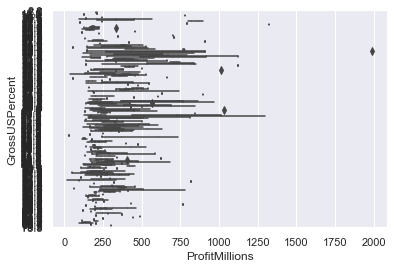

In [37]:
#Plotting

#create a single subplot: This will add flexibility in adjusting size

f,axes = plt.subplots()
#plot1= plt.scatter(Releases.Genre,Releases.GrossUSPercent)
plot2 = sns.boxplot(Releases.ProfitMillions,Releases.GrossUSPercent,orient='h')
#plt.legend(label=Releases.Studio)

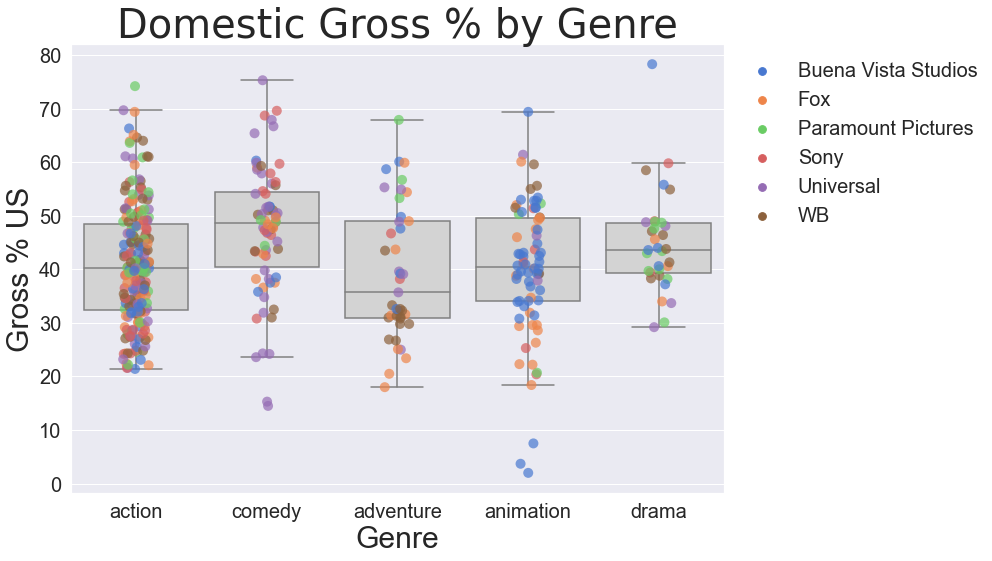

In [71]:
#creating a empty subplot
f,axes = plt.subplots()
#adding plots onto that empty subplot

plot2 = sns.boxplot(data=Releases, x='Genre',y='GrossUSPercent',color = 'lightgray',showfliers=False)
#boxplot parameter- orient changes boxplots orientation (v- vertical boxes, h- horizonal boxes)

#showfliers=False, means you don't want outliers.
plot = sns.stripplot(data=Releases, x='Genre',y='GrossUSPercent',hue='Studio',jitter=True,size=10,alpha=0.7)
#size parameter is used to increase the size of the dots and alpha is used to add transparency.

#plt.legend(label=Releases.Studio)

#working on the styling

#1. adusting the size
f.set_size_inches(11.7,8.27)

#2. Adding the title and adjusting its size
#plt.title("Domestic Gross % by Genre")

plt.title("Domestic Gross % by Genre",fontsize=40,\
         fontname="DejaVu Sans")

# Adding labels to the x and y axis
plt.ylabel("Gross % US", fontsize=30)

plt.xlabel("Genre", fontsize=30)

#5. Change the font size of the ticks (ticks are numbers that you see on each of your axis)
plt.yticks(fontsize=20)

plt.xticks(fontsize=20)

# adusting the size of the legend
plt.legend(prop={'size':20},frameon = False, bbox_to_anchor=(1,1))
plt.show()



#things which are left to be done
#1. how to eliminate the outliers from the boxplot

#2. how to adjust the color to light gray

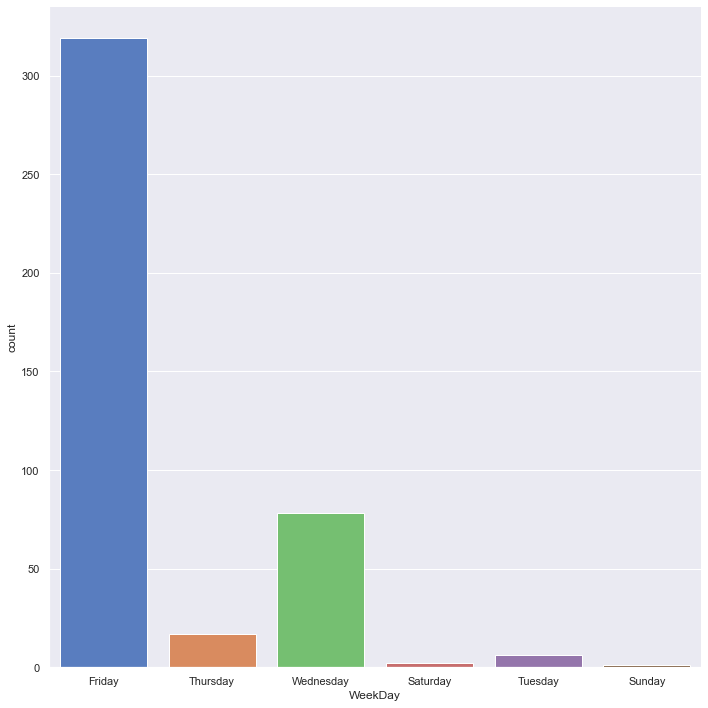

In [46]:
sns.factorplot(data=Releases, x='WeekDay',kind='count',size=10)

sns.catplot

In [62]:
mov = pd.read_csv('homework.csv')

mov1 =mov[~mov.Studio.isin(['Buena Vista Studios','Sony','Universal', 'WB', 'Paramount Pictures', 'Fox'])]




In [63]:
mov1.Studio.unique()

array(['Lionsgate', 'Weinstein Company', 'UA Entertainment',
       'WB/New Line', 'New Line Cinema', 'TriStar', 'Relativity Media',
       'Screen Gems', 'StudioCanal', 'Fox Searchlight Pictures',
       'MiraMax', 'Path_ Distribution', 'DreamWorks', 'Lionsgate Films',
       'Revolution Studios', 'Dimension Films', 'USA', 'Lionsgate/Summit',
       'Sony Picture Classics', 'Pacific Data/DreamWorks', 'Disney',
       'Art House Studios', 'Colombia Pictures', 'Gramercy Pictures',
       'Summit Entertainment', 'Vestron Pictures', 'MGM', 'Orion', 'IFC',
       'New Market Films'], dtype=object)